# Case 2
Dan Suman<br>
Last edited: 03.03.2019<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

Diabetic retinopathy is the leading cause of blindness in the working-age population of the developed world. It is estimated to affect over 93 million people. In this case study we will try to predict, based on a set of labelled images, if the patient is affected by this disease. We will preprocess the images in order to put an emphasis on the symptopms and try to create an accurate model based on CNN in order to do that. 

## 2. Required libraries

In [4]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline

## 3. Data description and preprocessing

We will first download a set of preprocessed data (run git clone https://github.com/Nomikxyz/retinopathy-dataset), then run the steps below to create the required directories.

In [1]:
import os, shutil
# List all filenames in the master dataset and count how many samples there are
original_dir = './retinopathy-dataset'

class1 = 'nosymptoms'
original_nosymptoms_dir = os.path.join(original_dir, class1)
nosymptoms_fnames = os.listdir(original_nosymptoms_dir)

class2 = 'symptoms'
original_symptoms_dir = os.path.join(original_dir, class2)
symptoms_fnames = os.listdir(original_symptoms_dir)

len(nosymptoms_fnames), len(symptoms_fnames)


In [ ]:
# Base directory is where the datasets will be created
base_dir = './dataset2'

# For training set
sub_dir = 'train'
train_dir = os.path.join(base_dir, sub_dir)
train_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
train_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

# For validation set
sub_dir = 'validation'
validation_dir = os.path.join(base_dir, sub_dir)
validation_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
validation_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

# For test set
sub_dir = 'test'
test_dir = os.path.join(base_dir, sub_dir)
test_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
test_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

In [ ]:
try:
    print('Creating dataset folders to:', base_dir)
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(train_nosymptoms_dir)
    os.mkdir(train_symptoms_dir)
    os.mkdir(validation_dir)
    os.mkdir(validation_nosymptoms_dir)
    os.mkdir(validation_symptoms_dir)
    os.mkdir(test_dir)
    os.mkdir(test_nosymptoms_dir)
    os.mkdir(test_symptoms_dir)
    print('Done.')
except:
    print('Error:')
    print(base_dir, 'already exists!')

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

In [ ]:
# Set the random seed
random.seed(2019)

# Disease (symptom) cases split

# Take 25 % out for testing
train_symptoms_fnames, test_symptoms_fnames = train_test_split(symptoms_fnames, test_size = 0.25)

# From the remaining images take 1/3 out for validation (= (1-0.25)*1/3 = 0.25)
train_symptoms_fnames, validation_symptoms_fnames = train_test_split(train_symptoms_fnames, test_size = 1.0/3.0)

len(train_symptoms_fnames), len(validation_symptoms_fnames), len(test_symptoms_fnames)

In [ ]:
# Healthy (nosyptom) cases split
# Take 25 % out for testing
train_nosymptoms_fnames, test_nosymptoms_fnames = train_test_split(nosymptoms_fnames, test_size = 0.25)

# From the remaining take 1/3 out for validation
train_nosymptoms_fnames, validation_nosymptoms_fnames = train_test_split(train_nosymptoms_fnames, test_size = 1.0/3.0)

len(train_nosymptoms_fnames), len(validation_nosymptoms_fnames), len(test_nosymptoms_fnames)

In [2]:
import time

tStart = time.time()

# Copy the original files into the dataset folders

# Training set
# Disease 
for fname in train_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(train_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy 
for fname in train_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(train_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# Validation set
# Disease 
for fname in validation_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(validation_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy
for fname in validation_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(validation_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# Test set
# Disease
for fname in test_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(test_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy
for fname in test_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(test_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

tStop = time.time()
tElapsed = tStop - tStart
print('Time elapsed: {:.2f} sec'.format(tElapsed))

## 4. Modeling and compilation




In [17]:

# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
#                         input_shape=(256, 256, 3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(ZeroPadding2D((1,1), input_shape=(256, 256, 3)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_27 (ZeroPaddi (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 258, 258, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 130, 130, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 64)      36928     
__________

C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\dansu\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


## 5. Training and Validation

There are several ways to enhance the images in order to reduce model overfitting. Keras provides by default a few of them like: 
These are just a few of the options available (for more, see the documentation). Let's quickly go over what we just wrote:

- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too - high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- shear_range is for randomly applying shearing transformations
- zoom_range is for randomly zooming inside pictures
- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [18]:
from keras import optimizers

# Let's use slower learning rate than by default
# https://keras.io/optimizers/

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"
test_dir = "./dataset2/test"

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 256x256
    target_size=(256, 256),
    # We read images in batches
    batch_size=16,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=16,
        class_mode='binary')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        batch_size=16,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='case_2_run_7.hdf5', verbose=1, 
                               save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    callbacks=[checkpointer], 
    verbose=2, 
    shuffle=True,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 10)

Epoch 1/50
 - 26s - loss: 0.6515 - acc: 0.7000 - val_loss: 0.5474 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.54743, saving model to case_2_run_7.hdf5
Epoch 2/50
 - 23s - loss: 0.5148 - acc: 0.7750 - val_loss: 0.5572 - val_acc: 0.7188

Epoch 00002: val_loss did not improve from 0.54743
Epoch 3/50
 - 26s - loss: 0.5737 - acc: 0.7250 - val_loss: 0.5716 - val_acc: 0.6875

Epoch 00003: val_loss did not improve from 0.54743
Epoch 4/50
 - 24s - loss: 0.5729 - acc: 0.7000 - val_loss: 0.5188 - val_acc: 0.7162

Epoch 00004: val_loss improved from 0.54743 to 0.51881, saving model to case_2_run_7.hdf5
Epoch 5/50
 - 26s - loss: 0.5852 - acc: 0.7125 - val_loss: 0.5771 - val_acc: 0.7250

Epoch 00005: val_loss did not improve from 0.51881
Epoch 6/50
 - 25s - loss: 0.5605 - acc: 0.6813 - val_loss: 0.5667 - val_acc: 0.6687

Epoch 00006: val_loss did not improve from 0.51881
Epoch 7/50
 - 24s - loss: 0.5704 - acc: 0.6827 - val_loss: 0.5671 - val_acc: 0.6622

Epoch 00007: val_loss did

## 6. Evaluation

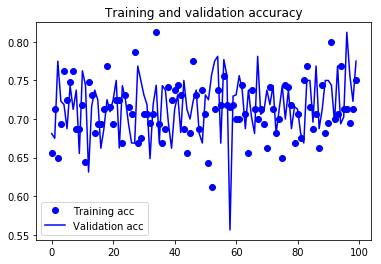

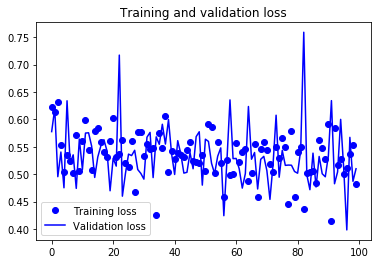

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
score = model.evaluate_generator(test_generator, 16, verbose=0)
print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  0.6274848785251379 Accuracy:  0.72265625


## 7. Conclusions

Several architectures have been tried out throughout this study case. The final architecture derives from the VGG-NET architecture (https://arxiv.org/pdf/1409.1556.pdf) but there are multiple options worth trying out - the ImageNET competition winners like AlexNET (http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) or ResNET (https://arxiv.org/pdf/1512.03385v1.pdf). The 2 unexplored interesting tryouts to be done in the future are the usage of Keras ImageNET pretrained models (https://keras.io/applications/) and transfer learning (the act of retraining the fully connected layer of the model specific to retinopathy dataset).